In [1]:
import numpy as np
import pandas as pd
# !pip install plotly
# !pip install cufflinks
# !pip install nltk
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

%config Completer.use_jedi = False

import seaborn as sns
import matplotlib.pyplot as plt
!pip install xgboost
from xgboost import XGBClassifier

In [2]:
import zipfile


In [3]:
zf = zipfile.ZipFile('./Dataset/consumer_complaints.csv.zip')
df = pd.read_csv(zf.open('consumer_complaints.csv'))
# df=pd.read_csv('../Consumer_Complaint/Dataset/complaints.csv')
# df.shape

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [7]:
df['product'].value_counts()

Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Other financial service       557
Name: product, dtype: int64

In [8]:
df['product'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of Complaints', 
                                                                title='Number complaints in each product')


In [10]:
pd.notnull(df['consumer_complaint_narrative']).value_counts()

False    489151
True      66806
Name: consumer_complaint_narrative, dtype: int64

In [12]:
Data = df[['product','consumer_complaint_narrative']]
Data = Data[pd.notnull(Data['consumer_complaint_narrative'])]
Data

,product,consumer_complaint_narrative
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Consumer Loan,Due to inconsistencies in the amount owed that...
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...
190207,Mortgage,I have an open and current mortgage with Chase...
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...
...,...,...
553084,Credit reporting,"XXXX XXXX is reporting incorrectly, payments h..."
553085,Credit reporting,Reflecting incorrect payment status. Have been...
553086,Payday loan,I have been paying {$180.00} a month through d...
553090,Mortgage,I recently became aware that Amerisave Mortgag...


In [14]:
# Data.rename(columns={'Consumer complaint narrative':'Consumer_complaint_narrative'},inplace=True)

Data.groupby('product').consumer_complaint_narrative.count()


product
Bank account or service     5711
Consumer Loan               3678
Credit card                 7929
Credit reporting           12526
Debt collection            17552
Money transfers              666
Mortgage                   14919
Other financial service      110
Payday loan                  726
Prepaid card                 861
Student loan                2128
Name: consumer_complaint_narrative, dtype: int64

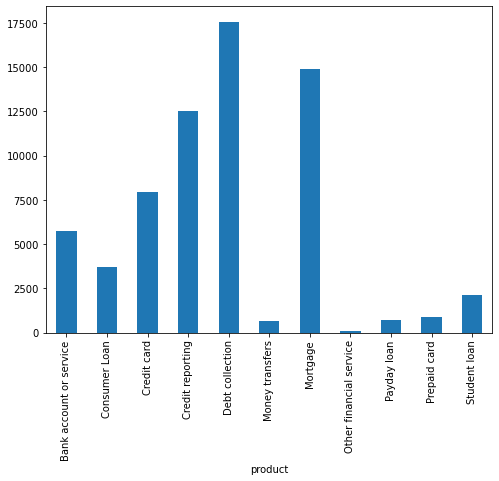

In [15]:
fig = plt.figure(figsize=(8,6))
Data.groupby('product').consumer_complaint_narrative.count().plot.bar()
plt.show()

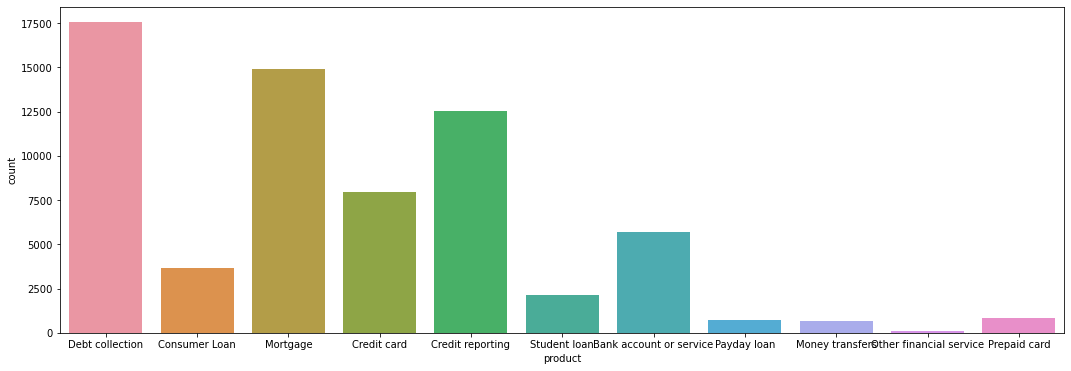

In [16]:
fig,ax = plt.subplots(figsize=(18,6))
sns.countplot(x='product',data=Data)

In [78]:
# Data['Consumer_complaint_narrative']=Data['Consumer_complaint_narrative'].apply(lambda x: ' '.join([i.lower() for i in x.split()]))

In [17]:
Data['consumer_complaint_narrative'].sample(2)

528474    Both my auto loan holder CNAC XXXX, WI and my ...
261497    In XXXX 2015 my loan was transferred to Bayvie...
Name: consumer_complaint_narrative, dtype: object

In [18]:
import re
import nltk 
# nltk.download('stopwords')
from nltk.corpus import stopwords
Stopwords=set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 


In [19]:
def clean_text(text):
    text=text.lower()
    text=re.sub(r'[-()\"#/@;:<>{}=~|.?,]', " ", text)
    text = ' '.join(word for word in text.split() if word not in Stopwords)
    
    return text

In [21]:
type(df['consumer_complaint_narrative'])

pandas.core.series.Series

In [22]:
Data['consumer_complaint_narrative']=Data['consumer_complaint_narrative'].astype(str).apply(clean_text)
Data['consumer_complaint_narrative'] =Data['consumer_complaint_narrative'].apply(lambda x:' '.join([lemmatizer.lemmatize(i) for i in x.split()]))

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [107]:
import torch
import torch.nn as nn

In [1]:
train_x, valid_x, train_y, valid_y = train_test_split(Data['consumer_complaint_narrative'], Data['product'],stratify=Data['Product'], 
                                                    test_size=0.25)

NameError: name 'train_test_split' is not defined

In [138]:
train_x
# nn.Embedding()

360630     previously disputed bankruptcy response verifi...
63143      came attention there incorrect information acc...
502713     received credit report three major credit repo...
197901     family held approved fha loan xxxx credit repo...
1663158    dear sir madam 've sent money $820 00 xxxx xxx...
                                 ...                        
705424     ordered pc xxxx pc severely damaged also came ...
557708     multiple medical debt credit score xx xx xxxxa...
1652763    xxxx payment xxxx never credited account calle...
266863     checked credit report saw account xxxx opploan...
1692352    modification loan granted xxxx citimortgage un...
Name: Consumer_complaint_narrative, Length: 492825, dtype: object

In [144]:
########TFIDF#############
tfidf=TfidfVectorizer()
tfidf.fit(Data['Consumer_complaint_narrative'])
xtrain_tfidf=tfidf.transform(train_x)
ytrain_tfidf=tfidf.transform(train_y)

In [178]:
print(ytrain_tfidf.shape)

(492825, 141086)


In [161]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier


In [184]:
# # clf=XGBClassifier()
# xgb_model = XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, eta=0.3, silent=1, subsample=0.8)
# xgb_model.fit(xtrain_tfidf, train_y)
# model=LGBMClassifier()

In [166]:

# # lightgbm
# param_grid = {
#     'n_estimators': [400, 700, 1000],
#     'colsample_bytree': [0.7, 0.8],
#     'max_depth': [15,20,25],
#     'num_leaves': [50, 100, 200],
#     'reg_alpha': [1.1, 1.2, 1.3],
#     'reg_lambda': [1.1, 1.2, 1.3],
#     'min_split_gain': [0.3, 0.4],
#     'subsample': [0.7, 0.8, 0.9],
#     'subsample_freq': [20]
# }
# !pip install lightgbm

In [ ]:
#### Deep Learning Model

In [29]:
import torch
import torch.nn as nn 
import torch.optim as optim
from torchtext import data    
from torchtext.vocab import Vectors
import spacy
# !python -m spacy download en
# !python -m spacy download en_core_web_sm
# import en_core_web_sm
# spacy.load('en_core_web_sm')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [25]:
word2vec = {}
with open('glove/glove.6B.200d.txt',encoding='utf-8') as vec_file:
    for line in vec_file:
        values=line.split()
#         print(values)
        words=values[0]
        vec = np.asarray(values[1:], dtype='float32') 
        word2vec[words]=vec
    print('Found %s word vectors.' % len(word2vec))
        

Found 400000 word vectors.


In [17]:
####model creation
# def model()
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english') 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [20]:
def tokenize(text):
    text=text.lower()
    tokens = [word for word in nltk.word_tokenize(text) ]
    print(tokens)
    lem=WordNetLemmatizer()
    
    stemmed_text = ' '.join([lem.lemmatize(item) for item in tokens if (item not in stop_words)])

    return stemmed_text

In [21]:
t="Cont'd attempts collect debt not owed"
clean_text=tokenize(t)
clean_text

['cont', "'d", 'attempts', 'collect', 'debt', 'not', 'owed']


"cont 'd attempt collect debt owed"

In [25]:
import pickle
import re
import nltk
# from flask import Flask, jsonify, request, render_template
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer


targets = {4: 'Debt collection ', 6: 'Mortgage', 3: 'Credit reporting', 2: 'Credit card', 0: 'Bank account or service ',
           1: 'Consumer Loan ', 10: "Student loan", 9: 'Prepaid card ', 8: 'Payday loan ', 5: 'Money transfers',
           7: 'Other financial service'}

clf = pickle.load(open('model.pkl', 'rb'))
loaded_vec = pickle.load(open("vectorizer.pkl", "rb"))


def pre_processing(text):
    lemmatizer = WordNetLemmatizer()
    text = text.lower()
    text = re.sub('[0-9]+', 'num', text)
    word_list = nltk.word_tokenize(text)
    word_list = [lemmatizer.lemmatize(item) for item in word_list]
    return ' '.join(word_list)


def scorer(text):
    encoded_text = loaded_vec.transform([text])
    score = clf.predict(encoded_text)
    return score




def predict_fn():
    # text = request.get_json()['text']
    # print('input_text',text)
    text1 = request.form.to_dict()
    print(text1)
    Data = pre_processing(text1['Data'])
    print(Data)
    predictions = scorer(Data)
   
    prediction = predictions.argmax(axis=0)[0]
    return render_template('results.html', result=jsonify({'Category': targets.get(prediction)}))



#     app.run(debug=True)

    ## user(text)-->preprocessing()-->



In [33]:
text="We purchased our family home located at XXXX XXXX XXXX XXXX in XXXX XXXX in XXXX. We have resided in our home as our primary residence since that purchase. We fell behind when the business owned by XXXX XXXX went under in XXXX. The XXXX 's financial situation began to improve in XXXX and they have been working with XXXX Bank as the servicer to Bank of America, as note owner to pursue a loan modification that would allow them to retain their home- A Full and complete loan modification package with all requisite financial information, documentation and forms was submitted to Bank of America via its HLP ( Hope Loan Port ) online submission system no later than XXXX/XXXX/XXXX. Here is an email form that HLP system from XXXX/XXXX/XXXX. Case Comments : ***Welcome***Hello, My name is XXXX XXXX and I will be your single point of contact for this file. I will provide you with timely updates and requests for documents throughout the review process. Please feel free to contact me through the HLP messages if you have any questions or concerns. Assistance is not guaranteed, however the borrower will be reviewed for all possible work out options. Thank You, XXXX Based upon that complete loan modification submission, in accordance with the CFPB rules, XXXX XXXX Bank of America instructed its counsel, XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX to file a Motion to Cancel the XXXX XXXX, XXXX Sale date ( this was XXXX sale date ). That motion was filed on XXXX/XXXX/XXXX but unfortunately, Plaintiff failed to set its Motion to Cancel for hearing. However, that sale should have been cancelled by the court without the need for hearing based upon CFPB rules or the Plaintiff could have simply, dismissed or stayed / suspended the action. ( see attached ) - Thereafter, Plaintiff 's counsel and Defense counsel submitted an agreed order to the Judge to cancel the sale based upon those CFPB rules but it was denied. - Following that denial ( with an agreed order ), Defendant 's counsel filed its own Motion to Cancel the XXXX/XXXX/XXXX sale date and have it heard on an emergency basis. The Judge refused to allow it to be argued. We have sensed learned this same Judge was through many other similar proceedings and wrong doings was removed from his position as a Foreclosure Judge in XXXX county the end of last year XXXX. - The sale went forward on XXXX/XXXX/XXXX in violation of those CFPB loss mitigation Federal servicing requirements. The bank took it back at auction. There was no 3rd party purchaser. The loan modification was in active review at the time of auction sale and had been active and complete for at least 60 days. - Defense counsel then filed an Objection to sale and motion to vacate sale based upon those CFPB violations. Defense counsel request in writing on multiple occasions for Plaintiff 's firm on behalf of Bank of America XXXX XXXX XXXX to voluntarily vacate the auction sale which it had the power to do but they refused. The Objection to sale / Motion to Vacate was heard on XXXX/XXXX/XXXX and the Judge denied. THE SALE DATE MUST HAVE BEEN CANCELLED BECAUSE OF THE CONTROLLING CONSUMER FINANCIAL PROTECTION BUREAU rules. Those rules state in pertinent part : Plaintiff was prohibited from conducting a foreclosure auction sale in accordance withRegulation X of RESPA which states in pertinent part ; If a consumer submitted a complete loss mitigation application after Plaintiff/Servicer has made the XXXX notice or filing for the foreclosure process but more than 37 days before a foreclosure sale, plaintiff/servicer MUST not move for foreclosure judgment or order of sale, or conduct a foreclosure sale, until XXXX of the following occurs : a ) Servicer sends consumer a notice that the consumer is not eligible for any loss mitigation option and consumer has exhausted the appeal process. ( This provision is not applicable to the instant action ). b ) The consumer rejects all loss mitigat "


pcl=pre_processing(text)
print(pcl)

encode=scorer(pcl)
print(encode)

# m=encode.argmax(axis=0)[0]
# print(m)




we purchased our family home located at xxxx xxxx xxxx xxxx in xxxx xxxx in xxxx . we have resided in our home a our primary residence since that purchase . we fell behind when the business owned by xxxx xxxx went under in xxxx . the xxxx 's financial situation began to improve in xxxx and they have been working with xxxx bank a the servicer to bank of america , a note owner to pursue a loan modification that would allow them to retain their home- a full and complete loan modification package with all requisite financial information , documentation and form wa submitted to bank of america via it hlp ( hope loan port ) online submission system no later than xxxx/xxxx/xxxx . here is an email form that hlp system from xxxx/xxxx/xxxx . case comment : * * * welcome * * * hello , my name is xxxx xxxx and i will be your single point of contact for this file . i will provide you with timely update and request for document throughout the review process . please feel free to contact me through t

In [36]:
!pip install connexion==2.6.0
from flask import jsonify
jsonify({'Category': targets.get(encode[0])})

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Attempting uninstall: connexion
    Found existing installation: connexion 2.7.0
    Uninstalling connexion-2.7.0:
      Successfully uninstalled connexion-2.7.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-airflow 2.0.2 requires attrs<21.0,>=20.0, but you have attrs 21.4.0 which is incompatible.
apache-airflow 2.0.2 requires importlib-metadata~=1.7; python_version < "3.9", but you have importlib-metadata 4.11.3 which is incompatible.
apache-airflow 2.0.2 requires markupsafe<2.0,>=1.1.1, but you have markupsafe 2.0.1 which is incompatible.
apache-airflow 2.0.2 requires sqlalchemy<1.4,>=1.3.18, but you have sqlalchemy 1.4.32 which is incompatible.
apache-airflow 2.0.2 requires werkzeug>=1.0.1,~=1.0, but you have werkzeug 2.1.1 which is incompatible.
You should consider upgrading via the 'C:\Users\HP\anaconda3\python.exe -m pip install --upgrade pip' command.


ImportError: cannot import name 'BaseResponse' from 'werkzeug.wrappers' (C:\Users\HP\anaconda3\lib\site-packages\werkzeug\wrappers\__init__.py)